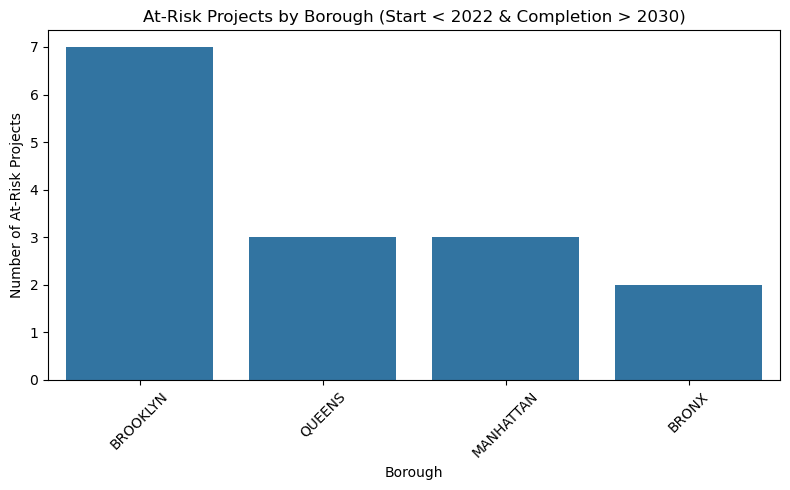

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("421-a_16__Affordable_New_York_Housing_Program_Completion_Extension_-_Letters_of_Intent_20250422.csv")
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

# Convert relevant columns
df["REPORTED_COMMENCEMENT_DATE"] = pd.to_datetime(df["REPORTED_COMMENCEMENT_DATE"], errors="coerce")
df["REPORTED_ANTICIPATED_COMPLETION_DATE"] = pd.to_datetime(df["REPORTED_ANTICIPATED_COMPLETION_DATE"], errors="coerce")

# --- 1. Identify At-Risk Projects ---
at_risk_projects = df[
    (df["REPORTED_COMMENCEMENT_DATE"] < pd.Timestamp("2022-01-01")) &
    (
        df["REPORTED_ANTICIPATED_COMPLETION_DATE"].isna() |
        (df["REPORTED_ANTICIPATED_COMPLETION_DATE"] > pd.Timestamp("2030-12-31"))
    )
]

# --- 2. Count At-Risk Projects by Borough ---
at_risk_by_borough = at_risk_projects["REPORTED_BOROUGH"].value_counts()

# --- 3. Plot the Results ---
plt.figure(figsize=(8, 5))
sns.barplot(x=at_risk_by_borough.index, y=at_risk_by_borough.values)
plt.title("At-Risk Projects by Borough (Start < 2022 & Completion > 2030)")
plt.xlabel("Borough")
plt.ylabel("Number of At-Risk Projects")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Optional: Export At-Risk Projects to CSV ---
at_risk_projects.to_csv("at_risk_projects.csv", index=False)
